# Intro

We will learn to fit models that include multiple explanatory variables. This is sometimes called "multiple regression". Including more explanatory variables in the model often gives you more insight into the relationship between the explanatory variables and the response, and can provide more accurate predictions. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\AHamdan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')

In [4]:
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [5]:
# Import ols from statsmodels.formula.api
from statsmodels.formula.api import ols

# Fit a linear regression of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data = taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [6]:
# Fit a linear regression of price_twd_msq vs. house_age_years, no intercept
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years + 0",data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_age.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [7]:
# Fit a linear regression of price_twd_msq vs. n_convenience plus house_age_years, no intercept
mdl_price_vs_both = ols("price_twd_msq ~ n_convenience + house_age_years + 0 ", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both.params)

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


## Interpreting parallel slopes coefficients

For linear regression with a single numeric explanatory variable, there is an intercept coefficient and a slope coefficient. For linear regression with a single categorical explanatory variable, there is an intercept coefficient for each category.

In the "parallel slopes" case, where you have a numeric and a categorical explanatory variable, what do the coefficients mean?

**- What is the meaning of the n_convenience coefficient?**

For each additional nearby convenience store, the expected house price, in TWD per square meter, increases by 0.79.

**- What is the meaning of the "0 to 15 years" coefficient?**

For a house aged 0 to 15 years with zero nearby convenience stores, the expected house price is 9.41 TWD per square meter.

## Visualizing each explanatory variable

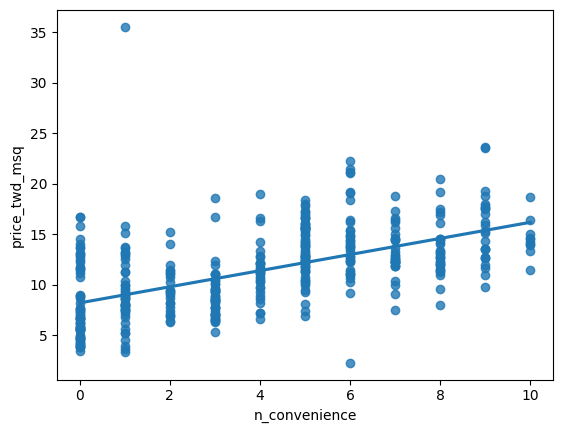

In [8]:
# Create a scatter plot with linear trend line of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience', y = 'price_twd_msq', data = taiwan_real_estate, ci = None)

# Show the plot
plt.show()

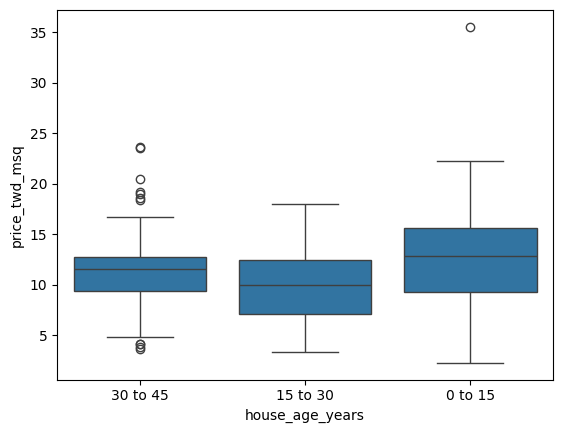

In [9]:
# Create a boxplot of price_twd_msq vs. house_age_years
sns.boxplot(x= 'house_age_years', y = 'price_twd_msq', data = taiwan_real_estate)

# Show the plot
plt.show()

## Visualizing parallel slopes

In [10]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Print coeffs
print(coeffs)

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


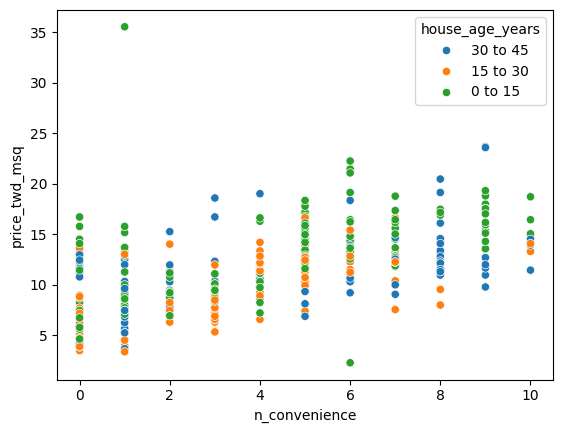

In [11]:
# Draw a scatter plot of price_twd_msq vs. n_convenience colored by house_age_years
sns.scatterplot(x= 'n_convenience', y = 'price_twd_msq', data = taiwan_real_estate, hue = 'house_age_years' )

# Show the plot
plt.show()

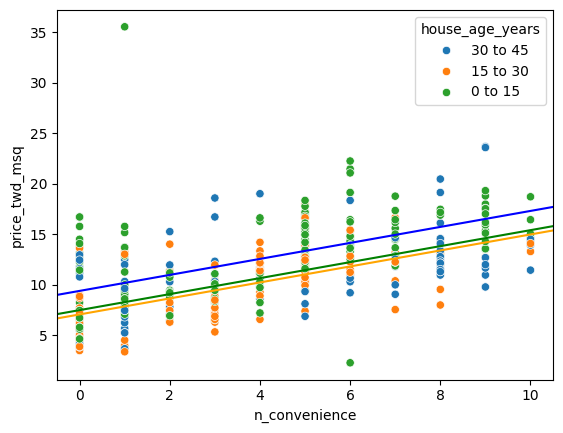

In [12]:
# Draw a scatter plot of price_twd_msq vs. n_convenience, colored by house_age_years
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add three parallel lines for each category of house_age_years
# Color the line for ic_0_15 blue
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")
# Color the line for ic_15_30 orange
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
# Color the line for ic_30_45 green
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")

# Show the plot
plt.show()

# 2- Predicting parallel slopes

Predicting responses is perhaps the most useful feature of regression models. With two explanatory variables, the code for prediction has one subtle difference from the case with a single explanatory variable.

For multiple explanatory variables, you need to define multiple columns in your explanatory DataFrame.

A useful trick to create such a DataFrame is to use the product function from the itertools module. The product function returns a Cartesian product of your input variables. In other words, it outputs all combinations of its inputs.

In [13]:
from itertools import product
# Create n_convenience as a range of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'house_age_years'])

# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_both.predict(explanatory_data))

print(prediction_data)

    n_convenience house_age_years  price_twd_msq
0               0        30 to 45       7.510958
1               0        15 to 30       7.085169
2               0         0 to 15       9.413325
3               1        30 to 45       8.302415
4               1        15 to 30       7.876627
5               1         0 to 15      10.204782
6               2        30 to 45       9.093873
7               2        15 to 30       8.668084
8               2         0 to 15      10.996239
9               3        30 to 45       9.885330
10              3        15 to 30       9.459541
11              3         0 to 15      11.787696
12              4        30 to 45      10.676787
13              4        15 to 30      10.250998
14              4         0 to 15      12.579153
15              5        30 to 45      11.468244
16              5        15 to 30      11.042455
17              5         0 to 15      13.370610
18              6        30 to 45      12.259701
19              6   

## Visualizing parallel slopes model predictions

In [14]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Print coeffs
print(coeffs)

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope  = coeffs

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


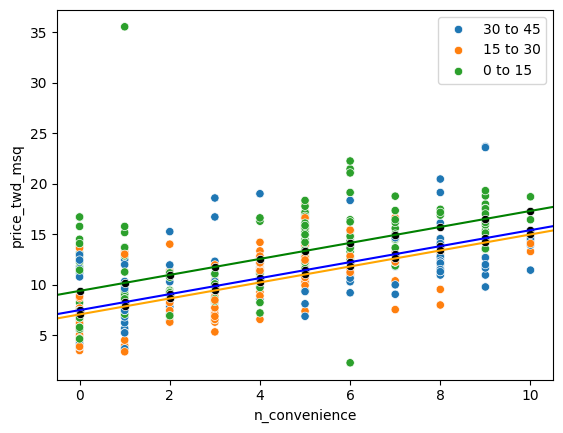

In [15]:
# Create the parallel slopes plot
plt.axline(xy1=(0, ic_0_15), slope=slope, color="green")
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
plt.axline(xy1=(0, ic_30_45), slope=slope, color="blue")
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add the predictions in black
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                color="black",
                data=prediction_data )

plt.show()

## 3-Assessing model performance

The big benefit of using more than one explanatory variable in a model is that you can sometimes get a better fit than when you use a single explanatory variable.

In [16]:
#Get R-squared for single liner regression
mdl_price_vs_conv.rsquared

0.32604660851305034

In [17]:
#Get R-squared for multiple liner regression
mdl_price_vs_both.rsquared

0.39517387968887396

In [18]:
#Get RSE for single liner regression
np.sqrt(mdl_price_vs_conv.mse_resid)

3.383887521343047

In [19]:
#Get RSE for multiple liner regression
np.sqrt(mdl_price_vs_both.mse_resid)

3.2134602805523227

### Overfitting
Adding more explanatory variables often increases the coefficient of determination for a model, but there is a problem. Including too many explanatory variables in your model can lead to a phenomenon called overfitting. 

That's when your model is optimized to provide the best fit for that particular dataset, but no longer reflects the general population. In our case if our model overfitted it will sutiable for house price in Tiwain Only not in other countries

A variant metric called adjusted coefficient of determination includes a small penalty term for each additional explanatory variable to compensate for this effect. Its a better metric than the plain coefficient of determination.

In [20]:
mdl_price_vs_conv.rsquared, mdl_price_vs_conv.rsquared_adj

(0.32604660851305034, 0.32441079931041206)

In our case, Since each model only contains one or two explanatory variables, the effect is minimal in all models.

## Models for each category

The parallel slopes model enforced a common slope for each category. That's not always the best option.

Recall that the house dataset had three different age categories. One way to give each age category a different slope is to run a separate model for each of these. 

In [21]:
# Filter for rows where house age is 0 to 15 years
taiwan_0_to_15 = taiwan_real_estate[taiwan_real_estate['house_age_years'] == '0 to 15']

# Filter for rows where house age is 15 to 30 years
taiwan_15_to_30 = taiwan_real_estate[taiwan_real_estate['house_age_years'] == '15 to 30']

# Filter for rows where house age is 30 to 45 years
taiwan_30_to_45 = taiwan_real_estate[taiwan_real_estate['house_age_years'] == '30 to 45']

In [22]:
# Model price vs. no. convenience stores using 0 to 15 data
mdl_0_to_15 = ols('price_twd_msq ~ n_convenience', data = taiwan_0_to_15).fit()

# Model price vs. no. convenience stores using 15 to 30 data
mdl_15_to_30 = ols('price_twd_msq ~ n_convenience', data = taiwan_15_to_30).fit()

# Model price vs. no. convenience stores using 30 to 45 data
mdl_30_to_45 = ols('price_twd_msq ~ n_convenience', data = taiwan_30_to_45).fit()


In [23]:
# Print the coefficients
print(mdl_0_to_15.params)
print(mdl_15_to_30.params)
print(mdl_30_to_45.params)

Intercept        9.241702
n_convenience    0.833587
dtype: float64
Intercept        6.871919
n_convenience    0.851917
dtype: float64
Intercept        8.113123
n_convenience    0.668698
dtype: float64


In [24]:
# Create explanatory_data, setting no. of conv stores from  0 to 10
explanatory_data = pd.DataFrame({'n_convenience' : np.arange(0,11,1)})

In [25]:
# Add column of predictions using "0 to 15" model and explanatory data 
prediction_data_0_to_15 = explanatory_data.assign(price_twd_msq = mdl_0_to_15.predict(explanatory_data))

# Same again, with "15 to 30"
prediction_data_15_to_30 = explanatory_data.assign(price_twd_msq = mdl_15_to_30.predict(explanatory_data))

# Same again, with "30 to 45"
prediction_data_30_to_45 = explanatory_data.assign(price_twd_msq = mdl_30_to_45.predict(explanatory_data))

In [26]:
print(prediction_data_0_to_15)
print(prediction_data_15_to_30)
print(prediction_data_30_to_45)

    n_convenience  price_twd_msq
0               0       9.241702
1               1      10.075289
2               2      10.908876
3               3      11.742462
4               4      12.576049
5               5      13.409636
6               6      14.243222
7               7      15.076809
8               8      15.910396
9               9      16.743982
10             10      17.577569
    n_convenience  price_twd_msq
0               0       6.871919
1               1       7.723836
2               2       8.575753
3               3       9.427670
4               4      10.279588
5               5      11.131505
6               6      11.983422
7               7      12.835339
8               8      13.687257
9               9      14.539174
10             10      15.391091
    n_convenience  price_twd_msq
0               0       8.113123
1               1       8.781822
2               2       9.450520
3               3      10.119218
4               4      10.787916
5         

C:\Users\AHamdan\AppData\Roaming\Python\Python38\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


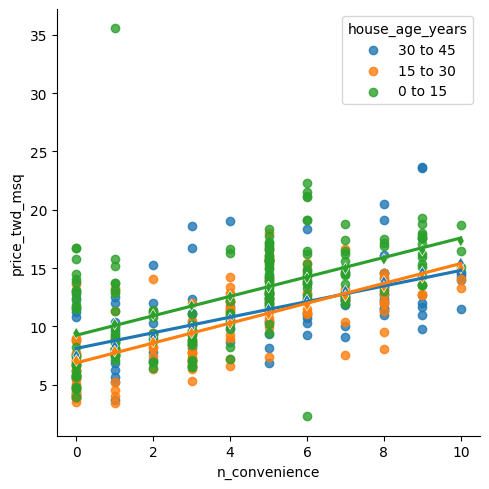

In [27]:
# Plot the trend lines of price_twd_msq vs. n_convenience for each house age category
sns.lmplot(x='n_convenience',
     y='price_twd_msq',
     data=taiwan_real_estate,
     hue='house_age_years',
     ci=None,
     legend_out=False)

# Add a scatter plot for prediction_data
sns.scatterplot(x= 'n_convenience', y = 'price_twd_msq',
data = prediction_data, hue = 'house_age_years', marker = 'd',
     legend=False)

plt.show()

### Assessing model performance

In [28]:
mdl_all_ages = ols('price_twd_msq ~ n_convenience', data = taiwan_real_estate).fit()

In [29]:
# Print the coeff. of determination for mdl_all_ages
print("R-squared for mdl_all_ages: ", mdl_all_ages.rsquared)

# Print the coeff. of determination for mdl_0_to_15
print("R-squared for mdl_0_to_15: ", mdl_0_to_15.rsquared)

# Print the coeff. of determination for mdl_15_to_30
print("R-squared for mdl_15_to_30: ", mdl_15_to_30.rsquared)

# Print the coeff. of determination for mdl_30_to_45
print("R-squared for mdl_30_to_45: ", mdl_30_to_45.rsquared)

R-squared for mdl_all_ages:  0.32604660851305034
R-squared for mdl_0_to_15:  0.3120536339435179
R-squared for mdl_15_to_30:  0.4424604869682426
R-squared for mdl_30_to_45:  0.3125713334387281


Meritable model metric measuring! It seems that both metrics for the 15 to 30 age group model are much better than those for the whole dataset model, but the models for the other two age groups are similar to the whole dataset model. Thus, using individual models will improve predictions for 15 to 30 age group.

### One model with an interaction

Messing about with different models for different bits of your dataset is a pain. A better solution is to specify a single model that contains intercepts and slopes for each category. This is achieved through specifying interactions between explanatory variables. 

To understand the idea of interactions between explanatory variables, consider what we know about the house price dataset. Different house ages have different price to n_convenience ratios. In statistical terms, we can say that the effect that n_convenience has on the expected price of the house varies between house age. That means that n_convenience and house age interact.

**More generally**, if the effect of one explanatory variable on the expected response has different values dependent on the values of another explanatory variable, then those two explanatory variables interact. 

**No interaction**
`reponse ~ explntry1 + explntry1`

**Implicit Interaction**
`reponse ~ explntry1 * explntry2`

**Explicit Interaction**
`reponse ~ explntry1 + explntry2 + explntry1 : explntry2 :`


In [30]:
# Model price vs both with an interaction using "times" syntax
mdl_price_vs_both_inter = ols('price_twd_msq ~ n_convenience * house_age_years', data = taiwan_real_estate ).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64


**Meaning:**
- Intercept : is the intercept for house_age_years[T.0 to 15]
- n_convenience  : is the slope for house_age_years[T.0 to 15]
- Other intercept vlaues is relative to house_age_years[T.0 to 15] intercept
- Other n_convenience is relative to house_age_years[T.0 to 15] slope

#### Use explicit formula and make all coefficients should be given relative to Zero

In [31]:
# Model price vs. house age plus an interaction, no intercept
mdl_readable_inter = ols("price_twd_msq ~ house_age_years + n_convenience: house_age_years+0", data = taiwan_real_estate).fit()

# Print the coefficients for mdl_readable_inter
print("\n", "mdl_readable_inter coefficients:", "\n", mdl_readable_inter.params)


 mdl_readable_inter coefficients: 
 house_age_years[0 to 15]                   9.241702
house_age_years[15 to 30]                  6.871919
house_age_years[30 to 45]                  8.113123
n_convenience:house_age_years[0 to 15]     0.833587
n_convenience:house_age_years[15 to 30]    0.851917
n_convenience:house_age_years[30 to 45]    0.668698
dtype: float64


 In fact, the model with the interaction is effectively the same as fitting separate models for each category, only you get the convenience of not having to manage four sets of code. 

## Making predictions with interactions

Let's run through the prediction flow again, this time with the model containing an interaction. 

#### The prediction flow

Here's the code for the prediction flow. It's exactly the same as the code in the parallel slopes model. The important thing to remember here is the use of product from itertools to get all the combinations of lengths and species. Then you convert this to a DataFrame, naming the columns accordingly. statsmodels will automatically take care of the interaction when creating prediction data, so you don't need to change anything. The final prediction data will look like this. 

In [32]:
from itertools import product
# Create n_convenience as a range of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'house_age_years'])

In [33]:
# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_both_inter.predict(explanatory_data))

# Print prediction_data
print(prediction_data)

    n_convenience house_age_years  price_twd_msq
0               0        30 to 45       8.113123
1               0        15 to 30       6.871919
2               0         0 to 15       9.241702
3               1        30 to 45       8.781822
4               1        15 to 30       7.723836
5               1         0 to 15      10.075289
6               2        30 to 45       9.450520
7               2        15 to 30       8.575753
8               2         0 to 15      10.908876
9               3        30 to 45      10.119218
10              3        15 to 30       9.427670
11              3         0 to 15      11.742462
12              4        30 to 45      10.787916
13              4        15 to 30      10.279588
14              4         0 to 15      12.576049
15              5        30 to 45      11.456614
16              5        15 to 30      11.131505
17              5         0 to 15      13.409636
18              6        30 to 45      12.125312
19              6   

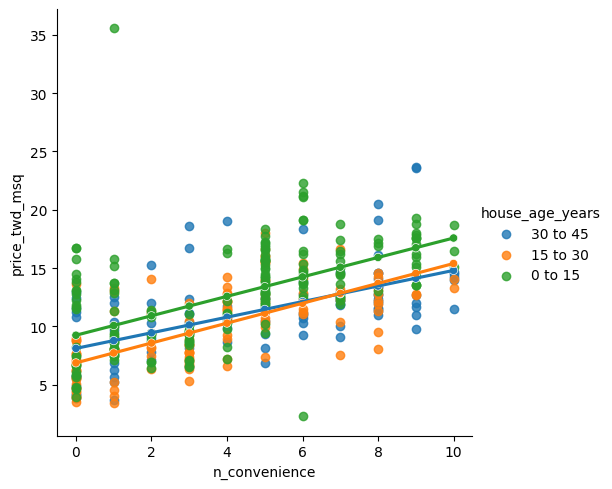

In [34]:
# Plot the trend lines of price_twd_msq vs. n_convenience colored by house_age_years
sns.lmplot(x = 'n_convenience', y = 'price_twd_msq', data = taiwan_real_estate, ci = None, hue = 'house_age_years')

# Add a scatter plot for prediction_data
sns.scatterplot(x = 'n_convenience', y = 'price_twd_msq', data = prediction_data, hue = 'house_age_years',
     legend=False)

# Show the plot
plt.show()

##  Simpson's Paradox
Simpson's paradox is that the trend given by a model on the whole dataset is very different from the trends in subsets of the data. That's pretty abstract, so let's try an example. 

One moral of this story is that it's helpful to try and visualize your dataset. This is especially true if different models give conflicting results. Some common advice for how to choose which model is best is correct but annoying. It depends on the dataset and what question you are trying to answer. A useful corollary is that you should decide on a question to answer before you start fitting models. 

Thinking up examples where the grouped model is best is fairly easy. Here's the same synthetic dataset as before, with different axis labels. If x is the number of hours spent playing games each month, and y is the score on a test, modeling the whole dataset suggests that playing more games is related to a higher test score. If we reveal that each group represents the age of the child taking the test, it changes the interpretation. Now older children score more highly in the test, and playing lots of games is related to a lower score. 

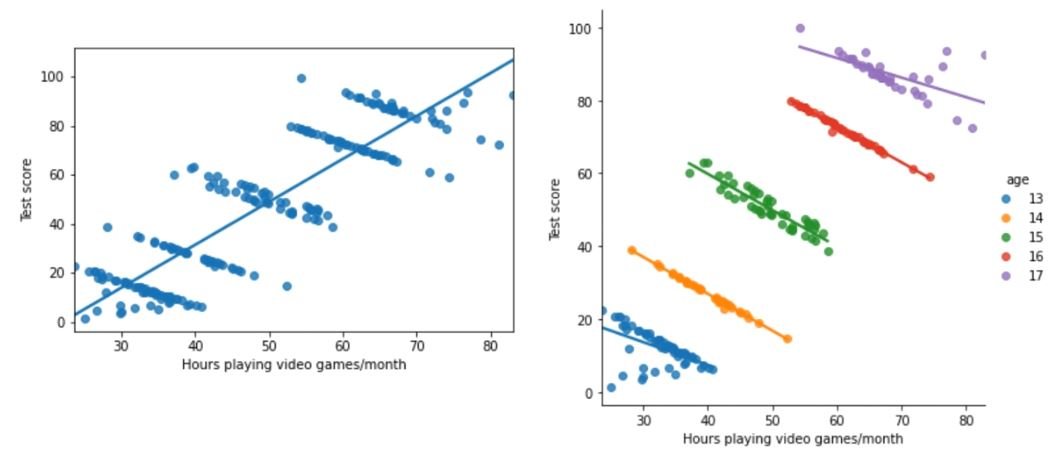

Coming up with examples where **the model of the whole dataset is more useful than the model split by group is harder**. One example is that for an infectious disease, the infection rate tends to be higher when the population density is higher. In this plot, each point represents a neighborhood in a city. Splitting by city reveals that the highest density areas of each city have lower infection rates. However, this may be due to other things that you haven't included in the model, like the wealth and demographics of the residents. That's an interesting insight, but "increasing population density is related to increased infection rate" is arguably more important. 

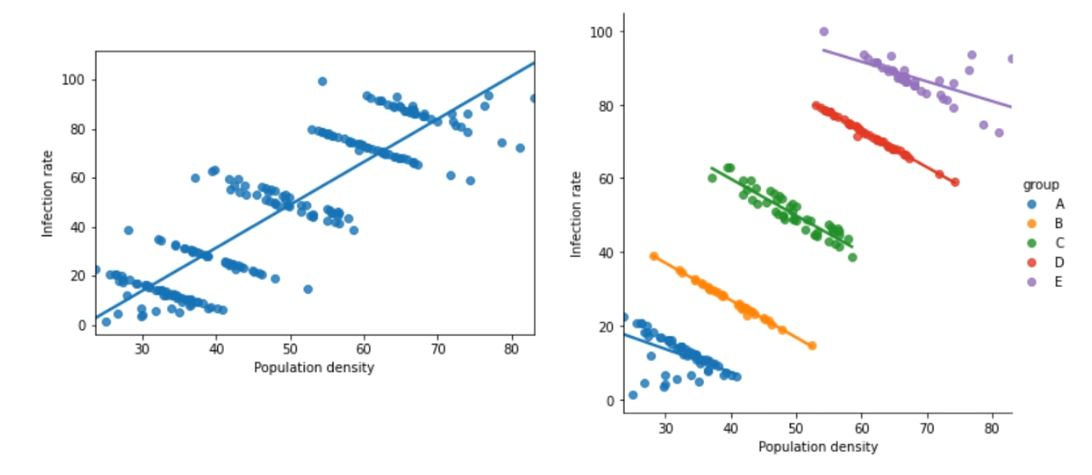

#### Reconciling the difference

- Usually (But not always) the models including the groups will contain more insight that you'd miss otherwise
- The disagreements between the models may reveal that you need even more explanatory variables to understand why they are different. 
- Again,I'm going to repeat the correct but annoying advice: to choose the best model you need contextual information about what your dataset means and what question you are trying to answer. 
- Such a clear case of Simpson's paradox is very rare. 
- Subtle differences between models are more common. 
- A slope may go to zero instead of changing its direction, You may only see the effect in some groups, but not all of them.

# Multiple Linear Regression:Two numeric explanatory variables

- In the previous chapters, the models had one numeric and one categorical explanatory variable. Let's see what changes if you have two numeric explanatory variables instead. 

- To explore uses color for the **response variable.** This is a standard 2D scatter plot so we can use seaborn, setting the hue argument to **response variable**

   dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474


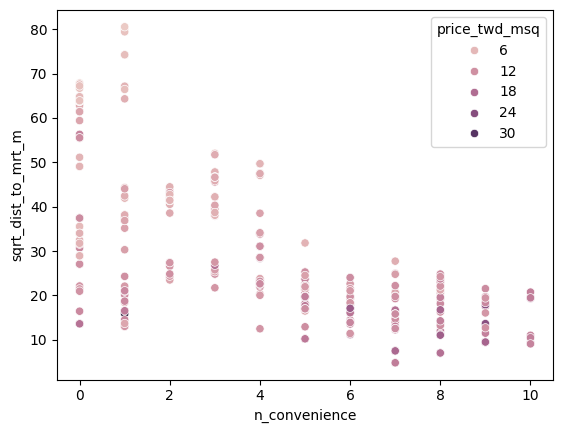

In [35]:
# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
print(taiwan_real_estate.head(1))
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])

# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience colored by price_twd_msq
sns.scatterplot(x= 'n_convenience', y ='sqrt_dist_to_mrt_m', data = taiwan_real_estate, hue ='price_twd_msq')

# Show the plot
plt.show()

In [36]:
# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
#taiwan_real_estate.head(1)
mdl_price_vs_conv_dist = ols('price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m', data = taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_conv_dist.params)

Intercept             15.103790
n_convenience          0.214221
sqrt_dist_to_mrt_m    -0.157300
dtype: float64


In [37]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11,1)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0,81,10)

# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = product(n_convenience,sqrt_dist_to_mrt_m )

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns = ['n_convenience','sqrt_dist_to_mrt_m' ])

# Add column of predictions
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_conv_dist.predict(explanatory_data) )

# See the result  
print(prediction_data)


    n_convenience  sqrt_dist_to_mrt_m  price_twd_msq
0               0                   0      15.103790
1               0                  10      13.530787
2               0                  20      11.957784
3               0                  30      10.384781
4               0                  40       8.811778
..            ...                 ...            ...
94             10                  40      10.953984
95             10                  50       9.380981
96             10                  60       7.807978
97             10                  70       6.234975
98             10                  80       4.661972

[99 rows x 3 columns]


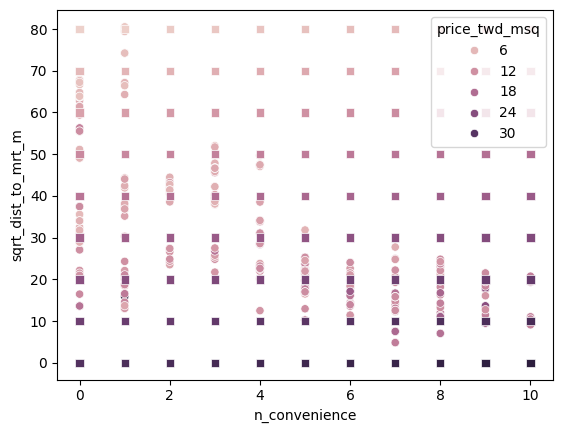

In [38]:
# Create scatter plot of taiwan_real_estate
sns.scatterplot(x= 'n_convenience', y = 'sqrt_dist_to_mrt_m', data =taiwan_real_estate , hue = 'price_twd_msq')

# Create scatter plot of prediction_data without legend
sns.scatterplot(x= 'n_convenience', y = 'sqrt_dist_to_mrt_m', data =prediction_data , hue = 'price_twd_msq', legend = False, marker = 's') 
# Show the plot
plt.show()

The color grid gives a nice overview of how the response variable changes over the plane of the explanatory variables

#### Including an interaction

In [40]:
# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()
mdl_price_vs_conv_dist_inter.params


Intercept                           14.737333
n_convenience                        0.424251
sqrt_dist_to_mrt_m                  -0.141211
n_convenience:sqrt_dist_to_mrt_m    -0.011245
dtype: float64

This gives you one extra slope term for the effect of the interaction between the two explanatory variables. 

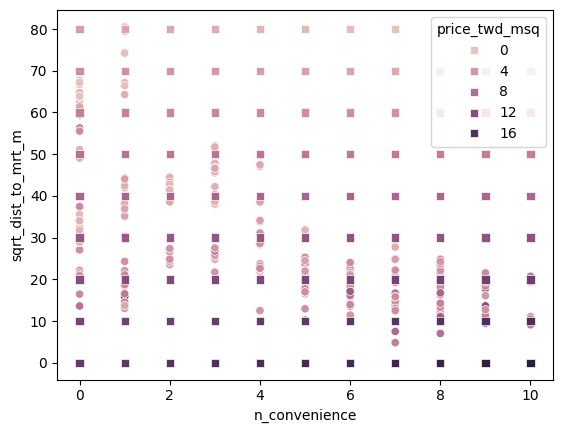

In [41]:
# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist_inter.predict(explanatory_data))

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")

plt.show()

The plotting code is identical, but the colors on the plot are slightly different. In this case, the colors of the square prediction points closely match the colors of the nearby circular data points, which is a nice visual indicator that the model is a good fit. 

# More than two explanatory variable

We'll consider three of them, and think about what happens when you increase that number even further. 

You can give each category its own panel with the FacetGrid function from Seaborn. 
- In a first step, you prepare the grid by specifying the layout: the col argument allows you to split by species, and the col_wrap argument makes it a two by two grid. The palette argument can be added optionally to improve the coloring. 

- The second step is to map what visualization you want to plot on the grid. In this case, you specify a scatter plot, with length and height on the x- and y-axis, respectively. 


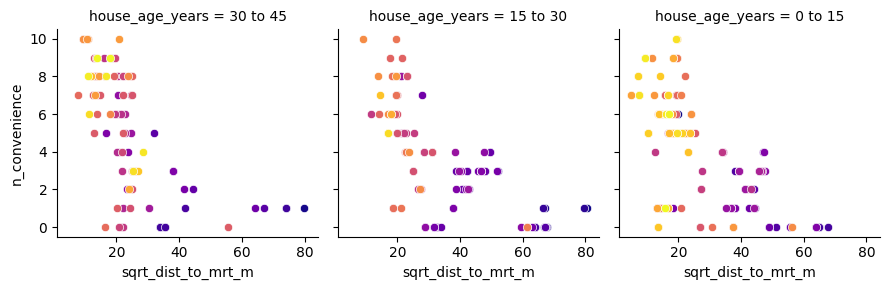

In [42]:
# Prepare the grid using taiwan_real_estate, for each house age category, colored by price_twd_msq
grid = sns.FacetGrid(data=taiwan_real_estate,
            col='house_age_years',
            hue='price_twd_msq',
            palette="plasma")

# Plot the scatterplots with sqrt_dist_to_mrt_m on the x-axis and n_convenience on the y-axis
grid.map(sns.scatterplot,
         'sqrt_dist_to_mrt_m',
         'n_convenience')

# Show the plot (brighter colors mean higher prices)
plt.show()

The plot shows the same as before: house price increases with shorter distances to the nearest MRT station, and increases with the number of nearby convenience stores. Faceting by house age suggests that this effect is similar for all house age groups. As you add more variables, it becomes increasingly challenging to create an easily interpretable plot.

**Plotting rapidly becomes more challenging as you increase the number of variables to display.**

### Different levels of interaction
By contrast, modeling doesn't get much harder as you increase the number of explanatory variables

Once you have three explanatory variables, the number of options for specifying interactions increases. 

- You can specify no interactions. 
- You can specify 2-way interactions, which gives you model coefficients for each pair of variables. 
- The third option is to specify all the interactions, which means the three 2-way interactions and the interaction between all three explanatory variables.

In [43]:
# Model price vs. no. of conv. stores, sqrt dist. to MRT station & house age, no global intercept, no interactions
#print(taiwan_real_estate.head(1))
mdl_price_vs_all_no_inter = ols('price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + house_age_years + 0', data = taiwan_real_estate ).fit()

# See the result
print(mdl_price_vs_all_no_inter.params)

house_age_years[0 to 15]     15.474464
house_age_years[15 to 30]    14.130059
house_age_years[30 to 45]    13.765494
n_convenience                 0.257666
sqrt_dist_to_mrt_m           -0.148102
dtype: float64


In [44]:
# 3-way interactions
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter = ols('price_twd_msq ~ sqrt_dist_to_mrt_m * n_convenience * house_age_years + 0', data = taiwan_real_estate ).fit()

# See the result
print(mdl_price_vs_all_3_way_inter.params)

house_age_years[0 to 15]                                        16.046849
house_age_years[15 to 30]                                       13.760066
house_age_years[30 to 45]                                       12.088773
sqrt_dist_to_mrt_m                                              -0.162944
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]                   0.036618
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]                   0.061281
n_convenience                                                    0.374982
n_convenience:house_age_years[T.15 to 30]                        0.078370
n_convenience:house_age_years[T.30 to 45]                        0.066720
sqrt_dist_to_mrt_m:n_convenience                                -0.008393
sqrt_dist_to_mrt_m:n_convenience:house_age_years[T.15 to 30]    -0.003821
sqrt_dist_to_mrt_m:n_convenience:house_age_years[T.30 to 45]     0.004401
dtype: float64


In [45]:
# 2-way interactions
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 2-way interactions
mdl_price_vs_all_2_way_inter = ols('price_twd_msq ~ (sqrt_dist_to_mrt_m + n_convenience + house_age_years) **2 + 0', data = taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_2_way_inter.params)

house_age_years[0 to 15]                          16.026633
house_age_years[15 to 30]                         13.880791
house_age_years[30 to 45]                         11.926904
sqrt_dist_to_mrt_m                                -0.162025
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]     0.031600
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.068198
n_convenience                                      0.384914
n_convenience:house_age_years[T.15 to 30]         -0.006894
n_convenience:house_age_years[T.30 to 45]          0.143416
sqrt_dist_to_mrt_m:n_convenience                  -0.008956
dtype: float64


### Predicting again

In [46]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11,1)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0,81,10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate['house_age_years'].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years )

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns  = ['n_convenience','sqrt_dist_to_mrt_m','house_age_years'])

# See the result
print(explanatory_data)

     n_convenience  sqrt_dist_to_mrt_m house_age_years
0                0                   0        30 to 45
1                0                   0        15 to 30
2                0                   0         0 to 15
3                0                  10        30 to 45
4                0                  10        15 to 30
..             ...                 ...             ...
292             10                  70        15 to 30
293             10                  70         0 to 15
294             10                  80        30 to 45
295             10                  80        15 to 30
296             10                  80         0 to 15

[297 rows x 3 columns]


In [47]:
# Add column of predictions
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_all_3_way_inter.predict(explanatory_data))

# See the result
print(prediction_data)

     n_convenience  sqrt_dist_to_mrt_m house_age_years  price_twd_msq
0                0                   0        30 to 45      12.088773
1                0                   0        15 to 30      13.760066
2                0                   0         0 to 15      16.046849
3                0                  10        30 to 45      11.072148
4                0                  10        15 to 30      12.496811
..             ...                 ...             ...            ...
292             10                  70        15 to 30       0.900864
293             10                  70         0 to 15       2.515561
294             10                  80        30 to 45       5.179415
295             10                  80        15 to 30      -1.583811
296             10                  80         0 to 15       0.046831

[297 rows x 4 columns]


Notice however how rapidly the dimensions of the prediction dataset increase to account for all combinations. Visualizing these predictions isn't as useful anymore since it reaches the limit of visual interpretation, so we stick with predicting the response variable instead. 